In [30]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from scipy import signal as sgn
import IPython.display as ipd


# Setar diretório e arquivo
caminho = 'C:\\Users\\jeanm\\Documents\\Trabalho-de-PDS\\Audios\\'
arquivo_audio1 = "High-pitch-12.2kHz"
arquivo_audio2 = "mountain_king_16kHz"
spf1 = wave.open(caminho + arquivo_audio1 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio1 + '.wav')  # Ouvir Audio

In [31]:
spf2 = wave.open(caminho + arquivo_audio2 + '.wav', 'rb')
ipd.Audio(caminho + arquivo_audio2 + '.wav')  # Ouvir audio

In [32]:
# Parâmetros Gerais da Simulação
Fs1 = 16000  # Frequência de Amostragem
SimTime = 8  # Tempo de Simulação (s)
T = 1/Fs1  # Período de Amostragem
n1 = np.arange(0, SimTime, T)  # Array de Amostras
sz = Fs1 * SimTime  # Taxa do Projeto (Hz)
signal1_orig = np.frombuffer(spf1.readframes(sz), dtype=np.int16)  # Carregar sinal 1
signal2_orig = np.frombuffer(spf2.readframes(sz), dtype=np.int16)  # Carregar sinal 2

Text(0.5, 1.0, 'Sinal Modulante 1')

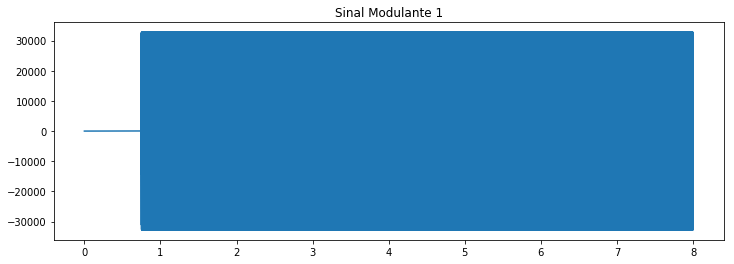

In [33]:
# Plotar sinal de audio 1
plt.figure(figsize=(12, 4))
plt.plot(n1, signal1_orig)
plt.title('Sinal Modulante 1')

Text(0.5, 1.0, 'Sinal Modulante 2')

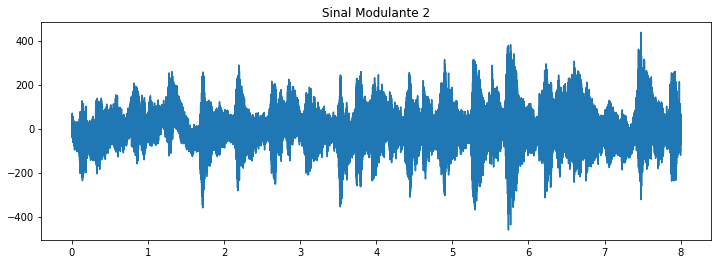

In [34]:
# Plotar sinal de audio 2
signal2 = sgn.resample(signal2_orig, 128000)
plt.figure(figsize=(12, 4))
plt.plot(n1, signal2_orig)
plt.title('Sinal Modulante 2')

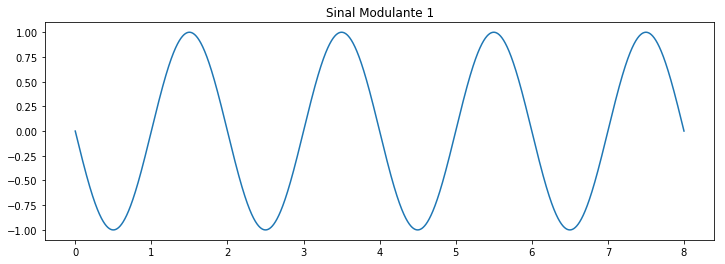

In [35]:
# Criação do sinal Modulante (Somente para testes)
Fm = 0.5  # Frequência do Modulante
Am = 1  # Amplitude do Modulante
phm = np.pi/2  # Fase da Modulante
m = Am*np.cos(2*np.pi*Fm*n1 + phm)
plt.figure(figsize=(12, 4))
plt.title('Sinal Modulante 1')
plt.plot(n1, m)

In [36]:
# Downsampling do Sinal 1
M = 2
signal1 = sgn.decimate(signal1_orig, M)  # Dizimação de parte do Sinal 1

# Downsampling do Sinal 2
M = 2  # Fator de dizimação
signal2 = sgn.decimate(signal2_orig, M)  # Dizimação de parte do Sinal 2

In [37]:
# Ajuste no Número de Amostras
Fs2 = 8000
n2 = np.arange(0, SimTime, 1/Fs2)  # Array de Amostras Após o Downsampling

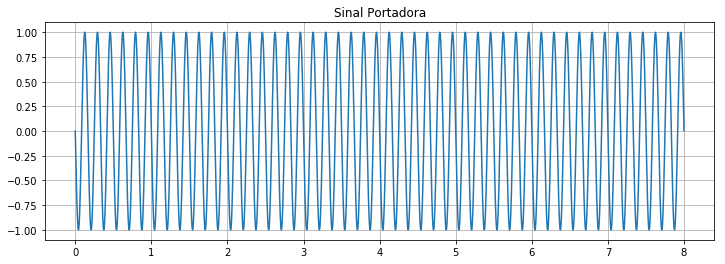

In [38]:
# Criação do Sinal Portadora de Transmissão
Fc = 6  # Frequência da Portadora
Ac = 1  # Amplitude da Portadora
phc = np.pi/2
carrier = Ac*np.cos(2*np.pi*Fc*n2 + phc)
plt.figure(figsize=(12, 4))
plt.title('Sinal Portadora')
plt.plot(n2, carrier)
plt.grid()

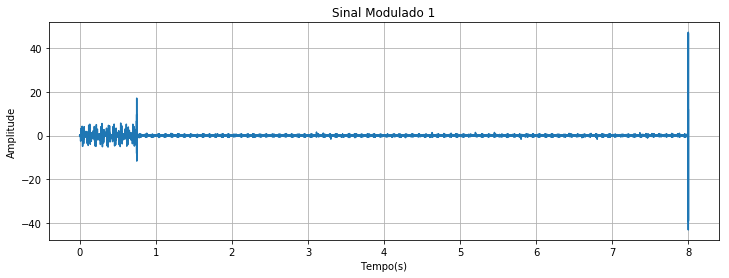

In [39]:
# Modulação Sinal de Audio 1 com Portadora(Carrier)
s1 = carrier * signal1
plt.figure(figsize=(12, 4))
plt.plot(n2, s1)
plt.title('Sinal Modulado 1')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

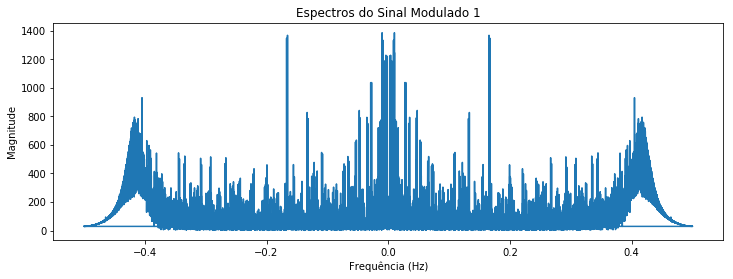

In [40]:
#  Espectros Sinal Modulado 1
spectrum = np.fft.fft(s1)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 1')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

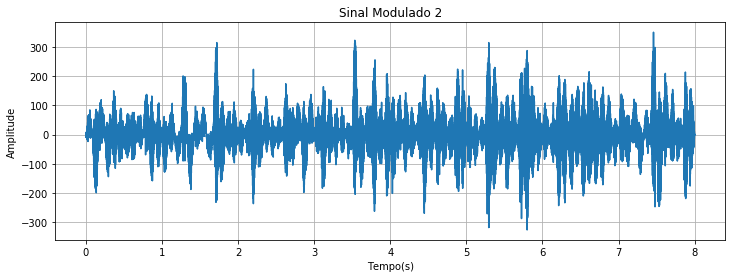

In [41]:
# Modulação Sinal de Audio 2 com Portadora(Carrier)
s2 = carrier * signal2
plt.figure(figsize=(12, 4))
plt.plot(n2, s2)
plt.title('Sinal Modulado 2')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequência (Hz)')

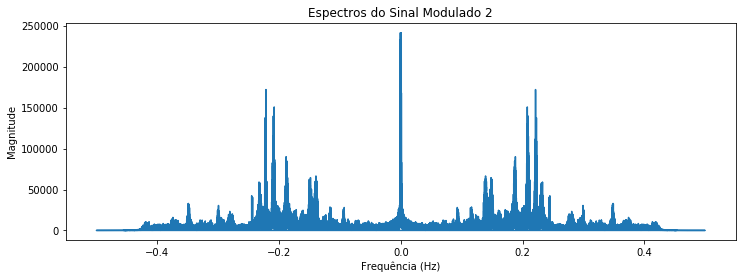

In [42]:
#  Espectros Sinal Modulado 2
spectrum = np.fft.fft(s2)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 2')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

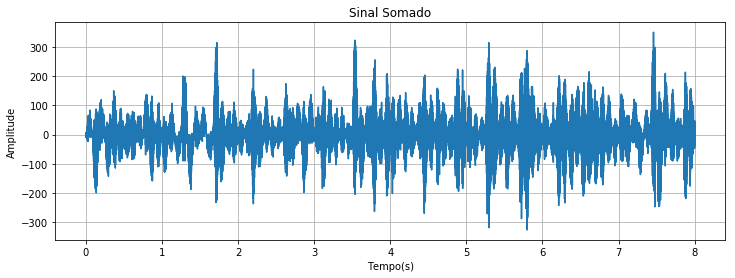

In [43]:
# Somatório dos Sinais Modulados
sinal_somado = s1 + s2
plt.figure(figsize=(12, 4))
plt.plot(n2, sinal_somado)
plt.title('Sinal Somado')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Text(0.5, 0, 'Frequência (Hz)')

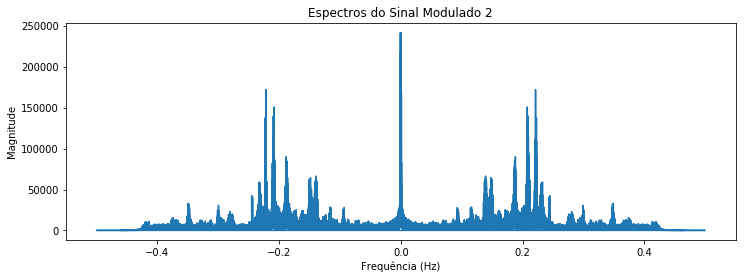

In [44]:
#  Espectros Sinal Modulado 2
spectrum = np.fft.fft(sinal_somado)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
phase = np.angle(spectrum)  # Fase do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Modulado 2')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

2.75
3.25
2.25
3.5


c:\users\jeanm\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Frequency [rad/sample]')

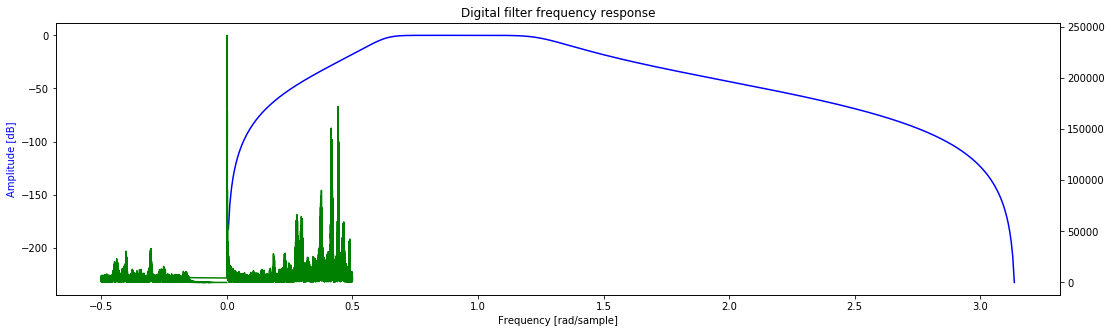

In [52]:
# Filtro Passa-Faixa
gpass= 3 # Ripple na banda de passagem
gstop= 40 # Atenuação na banda de rejeição
fs1=9000 # Frequências de rejeição
fp1= 11000# Frequências de corte
fp2=13000
fs2=14000
fn = Fs2/2 # Frequência de Nyquist
Wp1=fp1/fn  # Frequências normalizada
Wp2=fp2/fn  
Ws1=fs1/fn 
Ws2=fs2/fn 

a = abs(np.fft.fftshift(np.fft.fft(sinal_somado)))
a = a[int(len(a)/2):len(a)-1]
freqs = np.fft.fftfreq(len(a))
B,A = sgn.iirdesign(wp = [0.2, 0.4], ws= [0.1, 0.7], gstop= gstop, gpass=gpass, ftype='butter')
filtered_signal = sgn.lfilter(B, A, sinal_somado, axis=0)
w, h = sgn.freqz(B, A)
print(Wp1)
print(Wp2)
print(Ws1)
print(Ws2)
print(Wc)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax2.plot(freqs, a, 'g')

ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

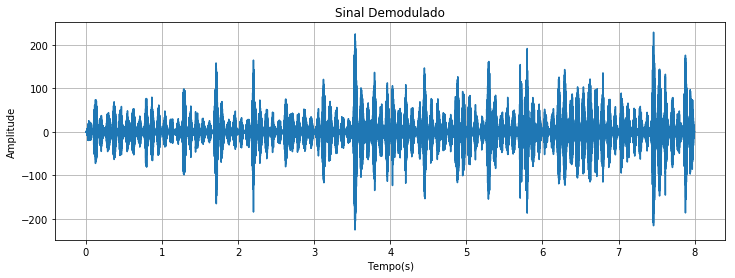

In [46]:
# Demodulação do sinal Somado
h1 = filtered_signal * np.cos(2*np.pi*Fc*n2 + np.pi/2)
plt.figure(figsize=(12, 4))
plt.plot(n2, h1)
plt.title('Sinal Demodulado')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()

Text(0.5, 0, 'Frequência (Hz)')

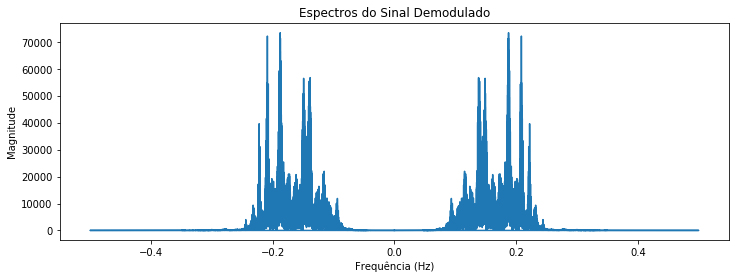

In [47]:
#  Espectros Sinal Demodulado
spectrum = np.fft.fft(h1)
freqs = np.fft.fftfreq(len(spectrum))
magnitude = np.abs(spectrum)    # Amplitude do Sinal
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude)
plt.title('Espectros do Sinal Demodulado')
plt.ylabel("Magnitude")
plt.xlabel('Frequência (Hz)')

Text(0, 0.5, 'Amplitude')

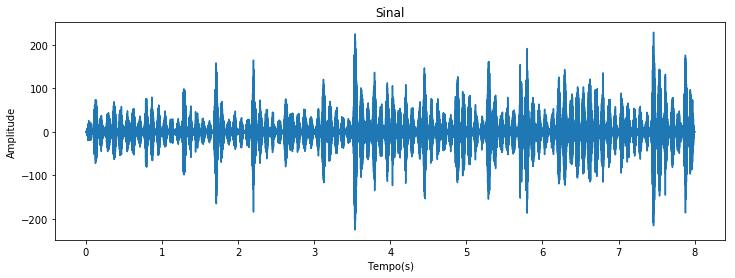

In [48]:
# Upsampling do Sinal
L = 2 
x = sgn.upfirdn([1], h1, L)
#x = sgn.resample(x, 128000)
plt.figure(figsize=(12, 4))
plt.plot(n1, x)
plt.title('Sinal')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')

In [49]:
ipd.Audio(x, rate=Fs1)

In [50]:
from sklearn import metrics
erro = metrics.mean_squared_error(x, signal2_orig)
print(erro)

5077.582198054178


In [51]:
#Calculo de SNR
avgPower1 = 0
avgPower2 = 0
for i in signal2_orig:
    avgPower1 += i ** 2
for i in x:
    avgPower2 += i ** 2

print (10 * np.log10(avgPower1 / len(signal2_orig) / (avgPower2 / len(x))))

11.798738226681216
